In [193]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [194]:
# Import data

type_Acc = pd.read_csv("https://www.data.gov.in/files/ogdpv2dms/s3fs-public/RA2021_A7.csv")
license = pd.read_csv("https://www.data.gov.in/files/ogdpv2dms/s3fs-public/RA2021_A36.csv")

In [195]:
type_Acc

,States/UTs,Fatal Accidents,Grievous Injury Accidents,Minor Injury Accidents,Non-Injury Accidents,Total Accidents
0,Andhra Pradesh,7585.0,4025.0,8115.0,1831.0,21556
1,Arunachal Pradesh,150.0,87.0,41.0,5.0,283
2,Assam,2893.0,3756.0,368.0,394.0,7411
3,Bihar,7061.0,2001.0,121.0,370.0,9553
4,Chhattisgarh,4982.0,1178.0,4824.0,1391.0,12375
5,Goa,218.0,176.0,423.0,2032.0,2849
6,Gujarat,6825.0,4923.0,2468.0,970.0,15186
7,Haryana,4403.0,1431.0,3966.0,133.0,9933
8,Himachal Pradesh,871.0,877.0,524.0,132.0,2404
9,Jharkhand,3221.0,1221.0,125.0,161.0,4728


In [196]:
license

,States,Valid Permanent License - Number,Learner's Licence,Without Licence,Others(Not known),Total Accidents
0,Andhra Pradesh,15034.0,716.0,3028.0,2778.0,21556
1,Arunachal Pradesh,221.0,16.0,19.0,27.0,283
2,Assam,4525.0,1367.0,353.0,1166.0,7411
3,Bihar,6069.0,654.0,283.0,2547.0,9553
4,Chhattisgarh,7278.0,667.0,1723.0,2707.0,12375
5,Goa,2764.0,0.0,51.0,34.0,2849
6,Gujarat,11600.0,967.0,982.0,1637.0,15186
7,Haryana,3095.0,109.0,224.0,6505.0,9933
8,Himachal Pradesh,1566.0,33.0,622.0,183.0,2404
9,Jharkhand,1262.0,444.0,652.0,2370.0,4728


In [197]:
#Standardizing the main column name
license = license.rename(columns={'States': 'States/UTs'})

In [198]:
# Cleaning the data

# Removing the Daman and Diu row as it contains all NaN values. All other rows are already clean
license.drop(index = 31, inplace = True)
license.reset_index(drop = True, inplace=True)
type_Acc.drop(index = 31, inplace = True)
type_Acc.reset_index(drop = True, inplace=True)

# Ensuring the state rows in both datasets have no hanging spaces
license["States/UTs"] = license["States/UTs"].str.strip()
type_Acc["States/UTs"] = type_Acc["States/UTs"].str.strip()

# Merging the 2 data sets
dat = pd.merge(type_Acc, license, on = "States/UTs", how='outer')

In [199]:
# Removing the unneccesary Total row as we are clustering only states
dat = dat[dat['States/UTs'] != 'Total']

In [200]:
# Extracting only the numeric data for clustering, leaving out the index column and the State names
temp = dat.reset_index(drop=True)
features = temp.select_dtypes(include=[float, int])

In [201]:
# Standardizing the data to avoid overfitting
scaler = StandardScaler()
scaled_dat = scaler.fit_transform(features)

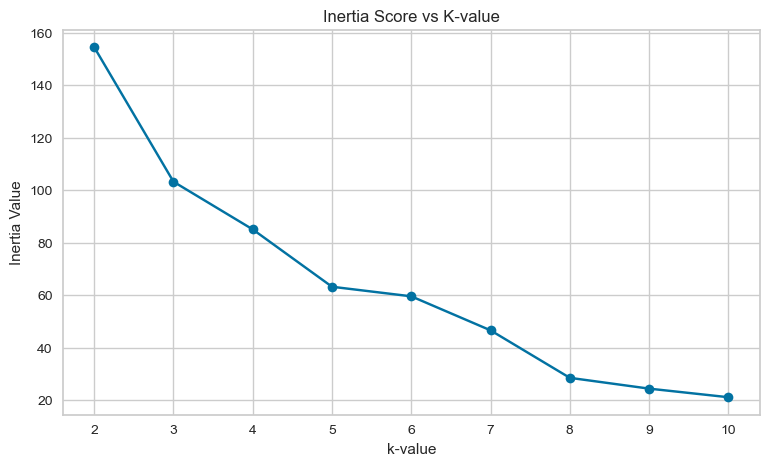

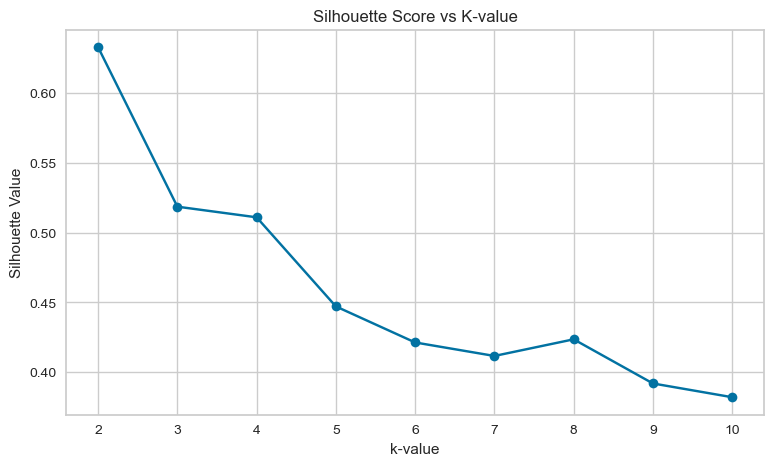

In [202]:
# Checking all k-values from 2-10

k_values = range(2,11)
inertia_val = []
sil_val = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_dat)
    
    inertia_val.append(kmeans.inertia_)
    
    sil_val.append(silhouette_score(scaled_dat, kmeans.labels_, sample_size=2000))

# Plots the intertia values
plt.figure(figsize=(9, 5))
plt.plot(k_values, inertia_val, 'bo-', label='Inertia')
plt.xlabel('k-value')
plt.ylabel('Inertia Value')
plt.title('Inertia Score vs K-value')
plt.show()

# Plots the silhouette values
plt.figure(figsize=(9, 5))
plt.plot(k_values, sil_val, 'bo-', label='Silhouette')
plt.xlabel('k-value')
plt.ylabel('Silhouette Value')
plt.title('Silhouette Score vs K-value')
plt.show()

In [203]:
# Clusters the data based on the best k-value
kmeans_final = KMeans(n_clusters=4, random_state=42)
kmeans_final.fit(scaled_dat)

# Adds a column to the dataset to indicate the state's cluster
dat['Cluster'] = kmeans_final.labels_

# Checking the average values of each column by cluster
cluster = dat.groupby('Cluster').mean(numeric_only=True)
print(cluster)

         Fatal Accidents  Grievous Injury Accidents  Minor Injury Accidents  \
Cluster                                                                       
0               1471.320                    974.160                  597.72   
1              12776.500                  12493.000                24214.00   
2               7600.125                   8180.625                 6243.75   
3              19026.000                  11609.000                 6312.00   

         Non-Injury Accidents  Total Accidents_x  \
Cluster                                            
0                     210.440           3253.640   
1                    2796.000          52279.500   
2                    1575.875          23600.375   
3                     782.000          37729.000   

         Valid Permanent License - Number  Learner's Licence  Without Licence  \
Cluster                                                                         
0                                  1912.8         

In [204]:
# Sorts the states according to the cluster values
result = dat.sort_values("Cluster")
print(result[["States/UTs", "Cluster"]])

                     States/UTs  Cluster
0   Andaman and Nicobar Islands        0
33                      Tripura        0
29                       Sikkim        0
27                       Punjab        0
26                   Puducherry        0
25                       Orissa        0
24                     Nagaland        0
23                      Mizoram        0
22                    Meghalaya        0
21                      Manipur        0
18                  Lakshadweep        0
35                  Uttarakhand        0
14                    Jharkhand        0
17                       Ladakh        0
12             Himachal Pradesh        0
2             Arunachal Pradesh        0
3                         Assam        0
4                         Bihar        0
5                    Chandigarh        0
13            Jammu and Kashmir        0
7        Dadra and Nagar Haveli        0
8                         Delhi        0
36                  West Bengal        0
11              